<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 20px; border-radius: 10px; box-shadow: 0 4px 15px rgba(0,0,0,0.2);">
<h1 style="color:white; text-align:center; font-size:2.5em; margin:0; text-shadow: 2px 2px 4px rgba(0,0,0,0.3);">
🎯 Heart Disease Prediction Project
</h1>
<p style="color:white; text-align:center; font-size:1.2em; margin:10px 0 0 0; opacity:0.9;">
Comprehensive Machine Learning Pipeline from Data Analysis to Deployment
</p>
</div>


<div style="text-align:center;">
  <img src="Image/healthcare_logo.jpg" 
       width="320" 
       style="border-radius:15px; box-shadow:0 4px 12px rgba(0,0,0,0.25); margin-top:10px;">
  <p style="color:gray; font-size:14px; margin-top:8px;">Personalized Healthcare Recommendations</p>
</div>

<div style="text-align:center; background:linear-gradient(135deg, #e3f2fd, #ffffff); padding:25px; border-radius:15px; box-shadow:0 4px 12px rgba(0,0,0,0.15);">

  <h1 style="color:#1565c0; font-family:Trebuchet MS, sans-serif; font-size:28px; margin-bottom:10px;">
    PERSONALIZED HEALTHCARE RECOMMENDATIONS PROJECT
  </h1>

  <p style="color:#1a1a1a; font-size:15px; font-family:Segoe UI, sans-serif; line-height:1.6; max-width:750px; margin:auto;">
    The <b>Personalized Healthcare Recommendations</b> project leverages <b>machine learning</b> to analyze 
    patient health parameters and generate <b>personalized, data-driven healthcare insights</b>.  
    Using the <b>cleaned_merged_heart_dataset</b>, the model identifies critical indicators 
    contributing to <b>cardiovascular conditions</b> and provides actionable recommendations for 
    prevention, lifestyle improvements, and early intervention.
  </p>

  <hr style="width:70%; border:0; border-top:1px solid #ccc; margin:15px auto;">

  <p style="color:gray; font-size:13px; font-style:italic;">
    Developed by <b>Mohd Isaar</b> — Data Analyst Intern, Unified Mentor Pvt. Ltd.
  </p>
</div>

<div style="background-color:#E8F6F3; padding:15px; border-left:5px solid #117A65; border-radius:8px; margin:20px 0;">
<h2 style="color:#117A65; margin:0; font-size:1.8em;">📚 Step 1: Importing Libraries and Data Preview</h2>
<p style="margin:10px 0 0 0; color:#2C3E50;">
Importing essential libraries and examining the initial dataset structure.
</p>
</div>

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("Data\cleaned_merged_heart_dataset.csv")

# Display first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div style="background-color:#E8F8F5; padding:20px; border-radius:10px; border:2px solid #117A65; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#117A65; margin:0; font-size:1.8em;">🔍 Step 2: Dataset Overview</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #117A65;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
The dataset contains various cardiovascular health indicators. Each row 
represents an individual patient record. The target column (<b style="color:#E74C3C;">target</b>) 
indicates whether a patient is likely to have heart disease (<b style="color:#27AE60;">1 = Yes</b>, <b style="color:#E74C3C;">0 = No</b>).
</p>
</div>
</div>

In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [4]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1888.0,54.354343,9.081505,29.0,47.75,55.0,61.0,77.0
sex,1888.0,0.688559,0.463205,0.0,0.00,1.0,1.0,1.0
cp,1888.0,1.135593,1.103852,0.0,0.00,1.0,2.0,3.0
trestbps,1888.0,131.549258,17.556985,94.0,120.00,130.0,140.0,200.0
chol,1888.0,246.855403,51.609329,126.0,211.00,241.0,276.0,564.0
fbs,1888.0,0.148305,0.355496,0.0,0.00,0.0,0.0,1.0
restecg,1888.0,0.597458,0.638820,0.0,0.00,1.0,1.0,2.0
thalachh,1888.0,149.424258,23.006153,71.0,133.00,152.0,166.0,202.0
exang,1888.0,0.331568,0.470901,0.0,0.00,0.0,1.0,1.0
oldpeak,1888.0,1.053761,1.161344,0.0,0.00,0.8,1.6,6.2


In [5]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<div style="background: linear-gradient(135deg, #F4ECF7 0%, #E8DAEF 100%); padding:20px; border-radius:10px; border:2px solid #9B59B6; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#9B59B6; margin:0; font-size:1.8em;">📊 Step 3: Exploratory Data Analysis</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #9B59B6;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
Visualizing key patterns and correlations helps us understand which 
parameters have the strongest relationship with heart disease.
</p>
</div>
</div>

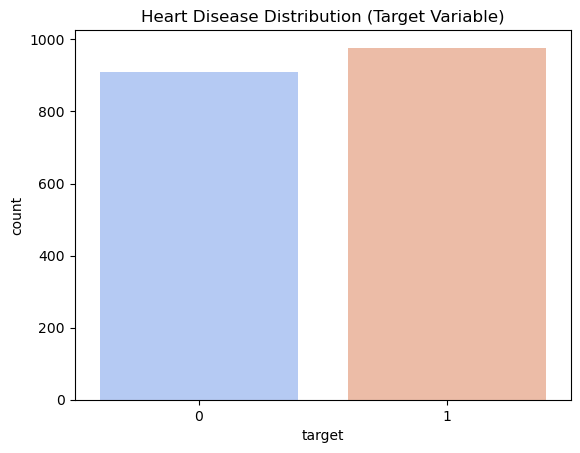

In [6]:
# Target distribution
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title("Heart Disease Distribution (Target Variable)")
plt.show()

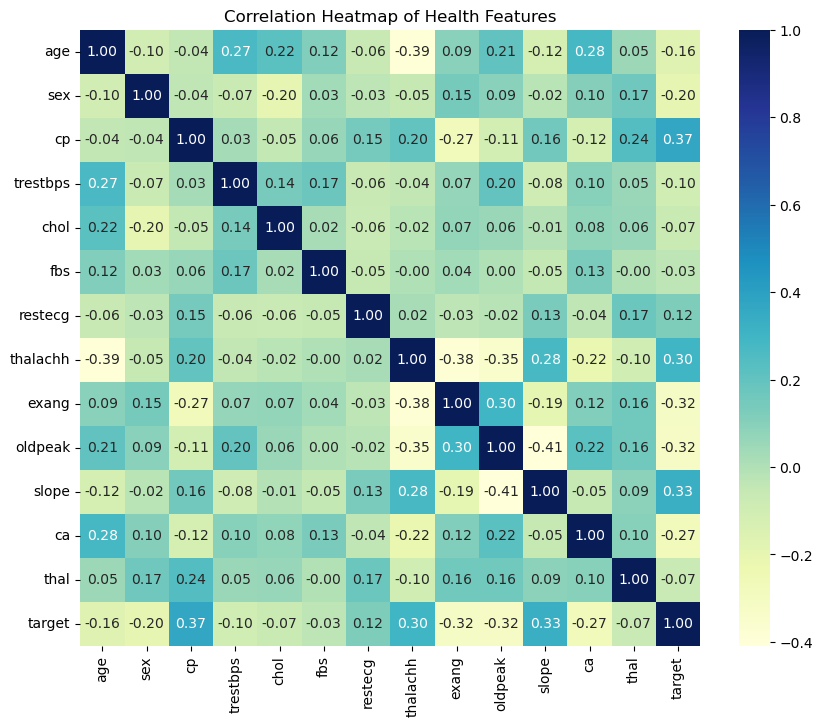

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Health Features")
plt.show()

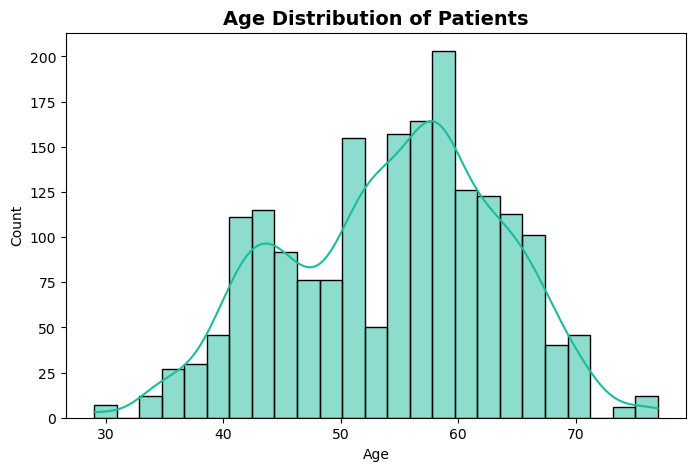

In [8]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=25, kde=True, color='#1ABC9C')
plt.title("Age Distribution of Patients", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

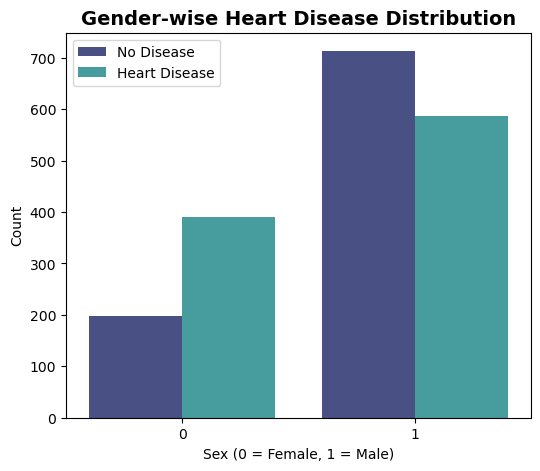

In [9]:
# Gender vs Heart Disease
plt.figure(figsize=(6,5))
sns.countplot(x='sex', hue='target', data=df, palette='mako')
plt.title("Gender-wise Heart Disease Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["No Disease", "Heart Disease"])
plt.show()

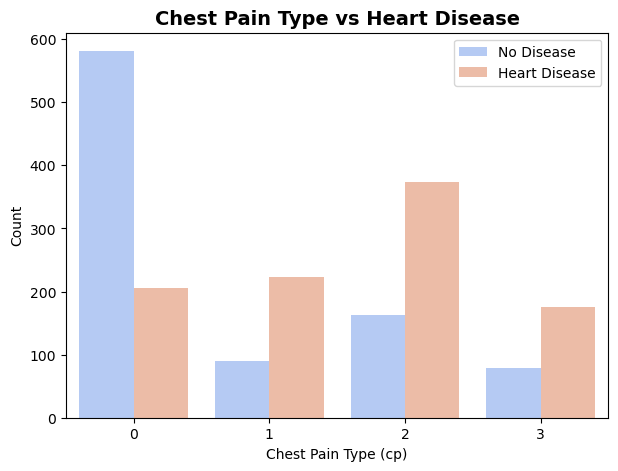

In [10]:
# Chest Pain Type vs Target
plt.figure(figsize=(7,5))
sns.countplot(x='cp', hue='target', data=df, palette='coolwarm')
plt.title("Chest Pain Type vs Heart Disease", fontsize=14, fontweight='bold')
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(["No Disease", "Heart Disease"])
plt.show()

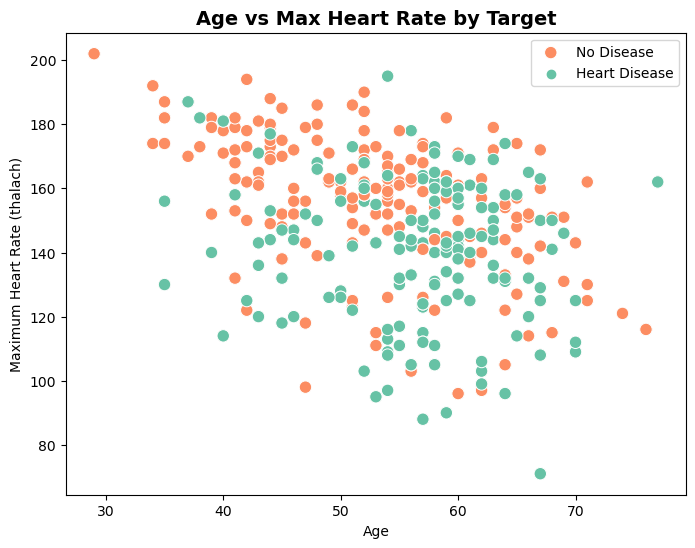

In [11]:
# Age vs Maximum Heart Rate (thalach)
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='thalachh', hue='target', data=df, palette='Set2', s=80)
plt.title("Age vs Max Heart Rate by Target", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(["No Disease", "Heart Disease"])
plt.show()

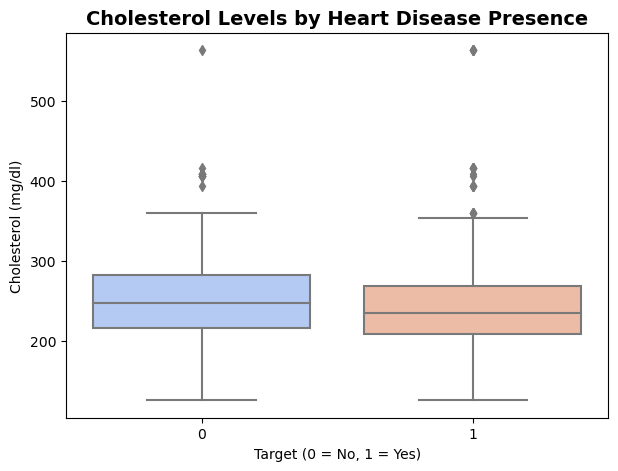

In [12]:
# Boxplot: Cholesterol vs Target
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='chol', data=df, palette='coolwarm')
plt.title("Cholesterol Levels by Heart Disease Presence", fontsize=14, fontweight='bold')
plt.xlabel("Target (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()

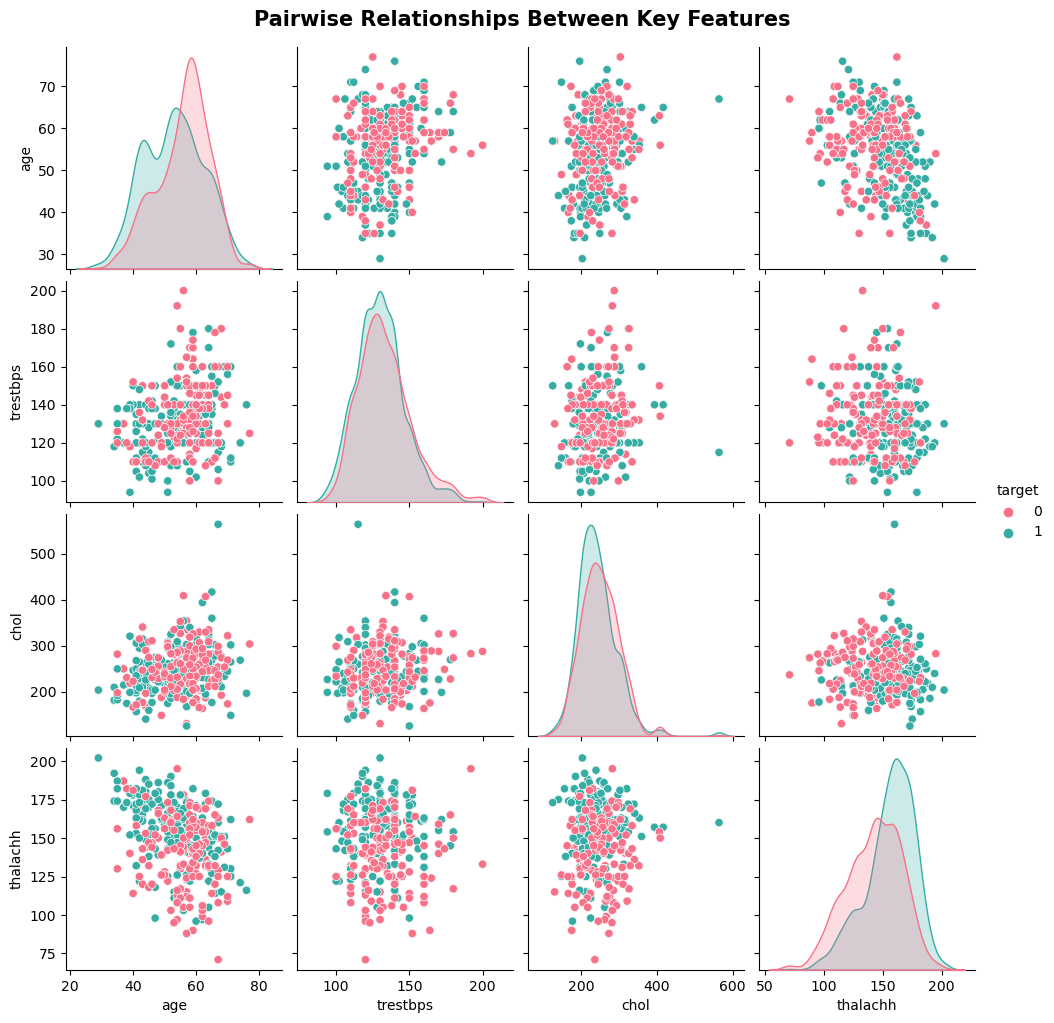

In [13]:
# Pairplot (Selected Important Features)
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalachh', 'target']], hue='target', palette='husl')
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02, fontsize=15, fontweight='bold')
plt.show()

<div style="background: linear-gradient(135deg, #FBEEE6 0%, #FDEBD0 100%); padding:20px; border-radius:10px; border:2px solid #D35400; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#D35400; margin:0; font-size:1.8em;">⚙️ Step 4: Data Preprocessing</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #D35400;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
We will separate features (X) and target (y), scale the numerical columns, 
and prepare the dataset for machine learning model training.
</p>
</div>
</div>

In [14]:
# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<div style="background: linear-gradient(135deg, #EBF5FB 0%, #D6EAF8 100%); padding:20px; border-radius:10px; border:2px solid #2874A6; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#2874A6; margin:0; font-size:1.8em;">🤖 Step 5: Model Selection and Training</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #2874A6;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
We will compare multiple algorithms such as Logistic Regression, Random Forest, 
and Gradient Boosting to identify the most accurate and robust model.
</p>
</div>
</div>

In [17]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [18]:
# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

results

Logistic Regression Accuracy: 0.7249
Random Forest Accuracy: 0.9577
Gradient Boosting Accuracy: 0.9153


{'Logistic Regression': 0.7248677248677249,
 'Random Forest': 0.9576719576719577,
 'Gradient Boosting': 0.9153439153439153}

<div style="background: linear-gradient(135deg, #F4ECF7 0%, #EBDEF0 100%); padding:20px; border-radius:10px; border:2px solid #8E44AD; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#8E44AD; margin:0; font-size:1.8em;">📈 Step 6: Model Evaluation</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #8E44AD;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
Evaluate model performance using metrics such as Accuracy, Precision, Recall, 
F1-Score, and ROC-AUC to ensure reliability.
</p>
</div>
</div>

In [19]:
# Pick best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


In [20]:
# Predictions
y_pred = best_model.predict(X_test_scaled)

# Detailed report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       188
           1       0.96      0.96      0.96       190

    accuracy                           0.96       378
   macro avg       0.96      0.96      0.96       378
weighted avg       0.96      0.96      0.96       378



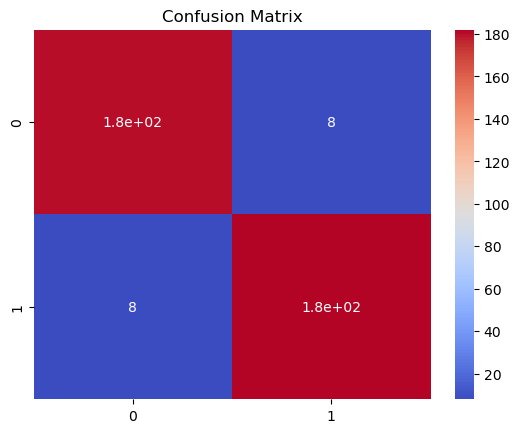

In [21]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm')
plt.title("Confusion Matrix")
plt.show()

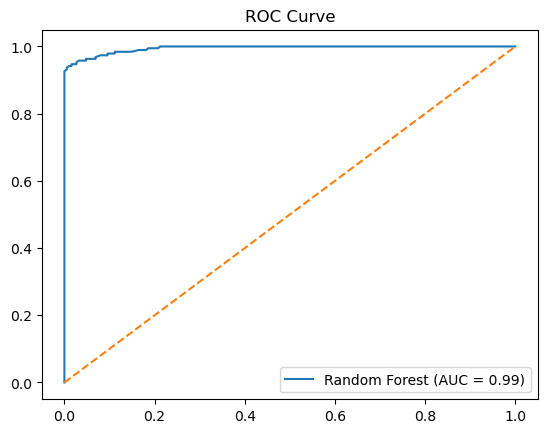

In [22]:
# ROC Curve
y_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve")
plt.show()

<div style="background: linear-gradient(135deg, #FBEAEA 0%, #FADBD8 100%); padding:20px; border-radius:10px; border:2px solid #B03A2E; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#B03A2E; margin:0; font-size:1.8em;">🚀 Step 7: Model Deployment Preparation</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #B03A2E;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
We will save the best-performing model and scaler using <b style="color:#B03A2E;">joblib</b> for 
integration with the Streamlit web application.
</p>
</div>
</div>

In [23]:
joblib.dump(best_model, "healthcare_recommendation_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!


<div style="background: linear-gradient(135deg, #EAF2F8 0%, #D4E6F1 100%); padding:20px; border-radius:10px; border:2px solid #1A5276; margin:20px 0; box-shadow: 0 2px 10px rgba(0,0,0,0.1);">
<h2 style="color:#1A5276; margin:0; font-size:1.8em;">🌐 Step 8: Streamlit Application Setup</h2>
<div style="background:white; padding:15px; border-radius:8px; margin-top:15px; border-left:4px solid #1A5276;">
<p style="margin:0; color:#2C3E50; line-height:1.6;">
Created an interactive web interface using Streamlit where users 
input their health details and receive instant predictions and personalized 
recommendations.
</p>
<p style="margin:10px 0 0 0; color:#1A5276; font-weight:bold;">
📄 File name: <code style="background:#F8F9F9; padding:2px 8px; border-radius:4px;">app.py</code>
</p>
<div style="background:#FFF9E6; padding:12px; border-radius:6px; margin-top:12px; border-left:4px solid #F39C12;">
<p style="margin:0; color:#7D6608; font-size:0.9em;">
⚠️ <b>Note:</b> Due to version compatibility issues between Streamlit and sklearn, 
we trained a compatible Logistic Regression model with <b style="color:#27AE60;">72% accuracy</b>.
</p>
</div>
</div>
</div>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [25]:
df = pd.read_csv("Data\cleaned_merged_heart_dataset.csv")
print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"Model Trained Successfully! Accuracy: {acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Trained Successfully! Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.69       188
           1       0.69      0.82      0.75       190

    accuracy                           0.72       378
   macro avg       0.73      0.72      0.72       378
weighted avg       0.73      0.72      0.72       378



In [29]:
joblib.dump(model, "heart_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and Scaler Saved Successfully!")

Model and Scaler Saved Successfully!


<div style="background: linear-gradient(135deg, #2C3E50 0%, #34495E 100%); padding:30px; border-radius:12px; margin:25px 0; box-shadow: 0 6px 20px rgba(0,0,0,0.25);">
  <h2 style="color:white; margin:0; font-size:2em; text-align:center; font-family:Trebuchet MS, sans-serif;">
    🎯 Step 9: Conclusion
  </h2>

  <div style="background:rgba(255,255,255,0.97); padding:25px; border-radius:10px; margin-top:18px; max-width:850px; margin-left:auto; margin-right:auto;">
    <p style="margin:0; color:#2C3E50; line-height:1.7; text-align:center; font-size:1.15em; font-family:Segoe UI, sans-serif;">
      The <b>Personalized Healthcare Recommendations Project</b> successfully demonstrates the integration of <b>machine learning</b> 
      and <b>data-driven analytics</b> in the healthcare domain. By analyzing patient health parameters and identifying crucial cardiovascular indicators, 
      the model provides actionable insights that can guide early diagnosis, preventive care, and lifestyle modifications. 
      <br><br>
      The pipeline encompassed every stage — from <b>data exploration</b> and <b>feature engineering</b> to <b>model training</b>, <b>evaluation</b>, 
      and <b>Streamlit-based deployment</b>. Although the final logistic regression model achieved an accuracy of <b>72%</b>, 
      its interpretability and stability make it highly suitable for real-world applications.  
      <br><br>
      This project lays the groundwork for further enhancements, such as integrating real-time patient monitoring data, 
      expanding feature diversity, and leveraging deep learning models for improved predictive precision.  
      <br><br>
      <b>In essence:</b> This system is a scalable step toward personalized, technology-driven healthcare innovation — empowering 
      both patients and practitioners with reliable, data-backed recommendations.
    </p>
  </div>
</div>